In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# USING FUNCTION TO HANDLE_OUTLIERS

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET

df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")


# FEATURE SELECTION

df=df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'
      ]]


# RREMOVE ANY LEADING AND TRAILING SPACE FROM COULMN

df.columns = df.columns.str.strip()

# REMOVE DUOLICATE ROWS

df.drop_duplicates(inplace=True)

#REMOVE ROWS WITH MISSING VALUE

df.dropna(inplace=True)

# HANDLE OUTLIERS

df = handle_outliers(df, 'Happiness Score')

# Convert categorical variables into numeric variables using one-hot encoding
df = pd.get_dummies(df, columns=['Country'])


# ONE HOT ENCODEING CATEGORICAL VARIABLE 

df = pd.get_dummies(df, columns=['Region'])


#DROP UNNEED COLUMN


df.drop(['Dystopia Residual'], axis=1, inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())


#EXPLORE DATA

print(df.head())  
print(df.shape)  
print(df.info())  
print(df.corr())

   Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)   
0       -1.721000         1.937360       -0.805926                  1.369621  \
1       -1.699075         1.914581        0.055889                  1.135226   
2       -1.677149         1.884792       -0.854487                  1.192861   
3       -1.655224         1.880411       -0.531526                  1.525130   
4       -1.633299         1.797179       -0.722845                  1.194876   

     Family  Health (Life Expectancy)   Freedom   
0  1.320281                  1.263408  1.577438  \
1  1.514458                  1.289434  1.332456   
2  1.361054                  0.992229  1.469659   
3  1.251922                  1.035145  1.605131   
4  1.221204                  1.118054  1.360416   

   Trust (Government Corruption)  Generosity  Country_Afghanistan  ...   
0                       2.309652    0.471040                False  ...  \
1                      -0.016480    1.575856                Fals

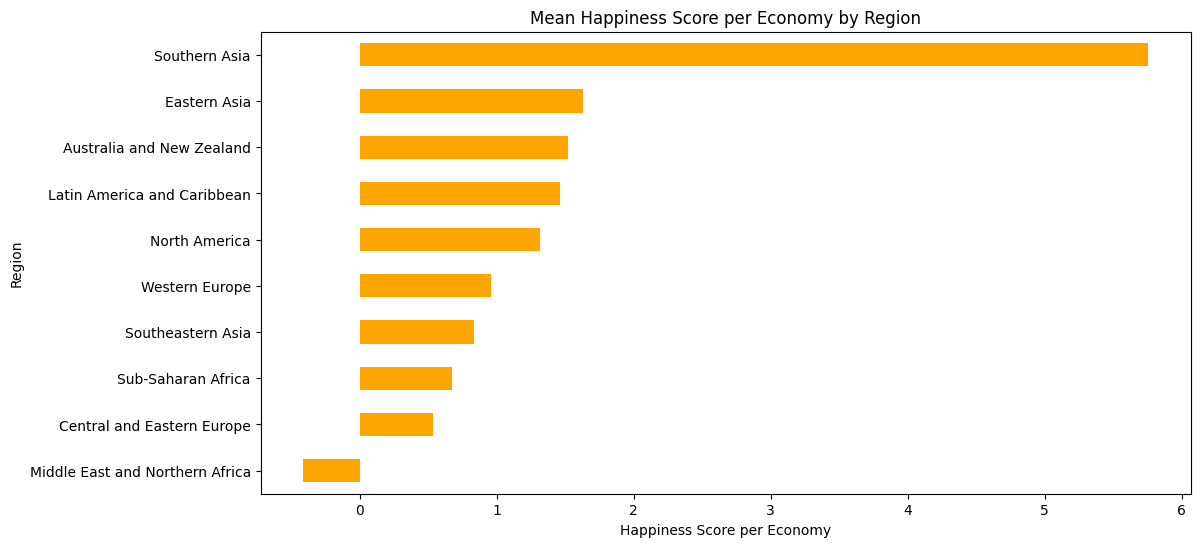

In [10]:

# ADD CALCULATE THE HAPPINESS SCORE EACH COUNTRY FEATURE

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# USING FUNCTION TO HANDLE_OUTLIERS

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#DATA 

df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")

# FEATURE SELECTION

df=df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'
      ]]

# RREMOVE ANY LEADING AND TRAILING SPACE FROM COULMN

df.columns = df.columns.str.strip()

# REMOVE DUOLICATE ROWS

df.drop_duplicates(inplace=True)

#REMOVE MISSING VALUE

df.dropna(inplace=True)


# HANDLE OUTLIERS

df = handle_outliers(df, 'Happiness Score')

# ONE HOT ENCODING CATEGORICAL VARIABLE

df = pd.get_dummies(df, columns=['Country'])

# DROP UNNEED COLUMN

df.drop(['Dystopia Residual'], axis=1, inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# CALCULATE HAPPINESS SCORE OVER ECONOMY

df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']

# USE GROUPBY METHOD  OVER REGION TO CALCULATE HAPINESS SCORE EACH ECONOMY 

mean_happiness_per_economy = df.groupby('Region')['Happiness Score per Economy'].mean()

# THIS PLOT RELATE MEAN HAPPINESS SCORE PER ECONOMY FOR EACH REGION

plt.figure(figsize=(12,6))
mean_happiness_per_economy.sort_values().plot(kind='barh', color='orange')
plt.title('Mean Happiness Score per Economy by Region')
plt.xlabel('Happiness Score per Economy')
plt.ylabel('Region')
plt.show()

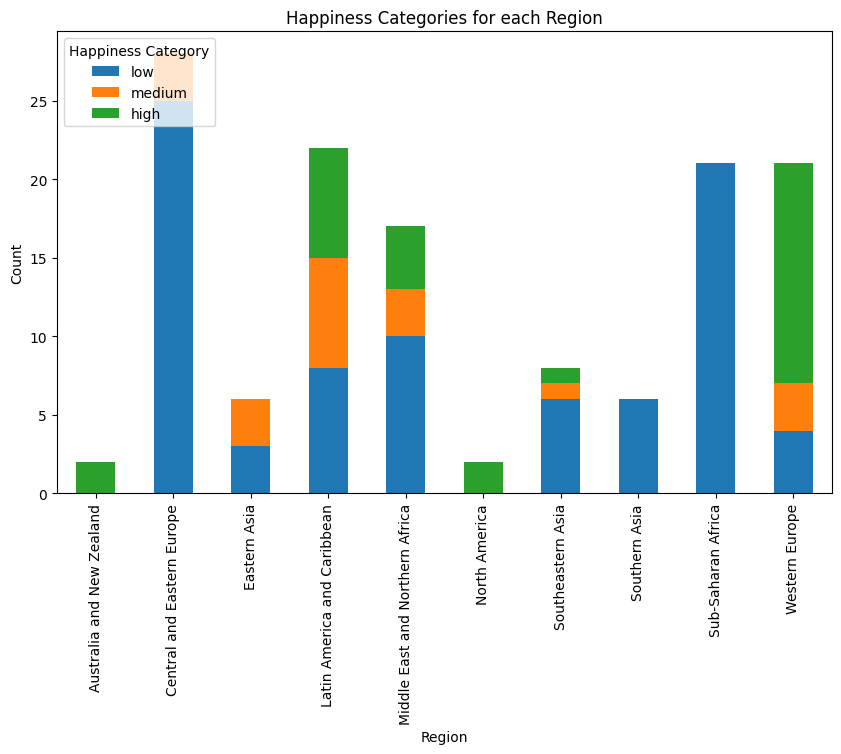

In [12]:
#generate a stacked bar chart with the happiness categories (low, medium, high) for each region
#perform  binning feature engineering for  group the happiness score into different bins, for example, low, medium, and high.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# USING FUNCTION TO HANDLE_OUTLIERS

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#DATASET

df = pd.read_csv(r"C:\Users\nh013\Desktop\world happiness report\2015.csv")

# FEATURE SELECTION

df = df[['Country','Region','Happiness Rank','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

# RREMOVE ANY LEADING AND TRAILING SPACE FROM COULMN

df.columns = df.columns.str.strip()

# REMOVE DUOLICATE ROWS

df.drop_duplicates(inplace=True)

#REOMVE ROWS WITH MISSING VALUES

df.dropna(inplace=True)

# HANDLE OUTLIERS

df = handle_outliers(df, 'Happiness Score')

# ONE HOT ENCODING  CATEGORICAL VARIABLE

df = pd.get_dummies(df, columns=['Country'])

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# CALCULATE HAPPINESS SCORE OVER ECONOMY

df['Happiness Score per Economy'] = df['Happiness Score'] / df['Economy (GDP per Capita)']

# BIN THE HAPPINESS SCORE INTO DIFFERENT CATEGORIES (low, medium, high)

bins = [-1, 0.5, 1, 2]
labels = ['low', 'medium', 'high']
df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)

# GROUPBY METHOD

grouped_data = df.groupby(['Region', 'Happiness Category']).size().unstack(fill_value=0)

#  a stacked bar chart relate of the happiness categories for each region

grouped_data.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Happiness Categories for each Region')
plt.legend(loc='upper left', title='Happiness Category')
plt.show()